# Trend Changes

In [12]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [13]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

**This data is used because it has a clear trend line change**

In [14]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [15]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

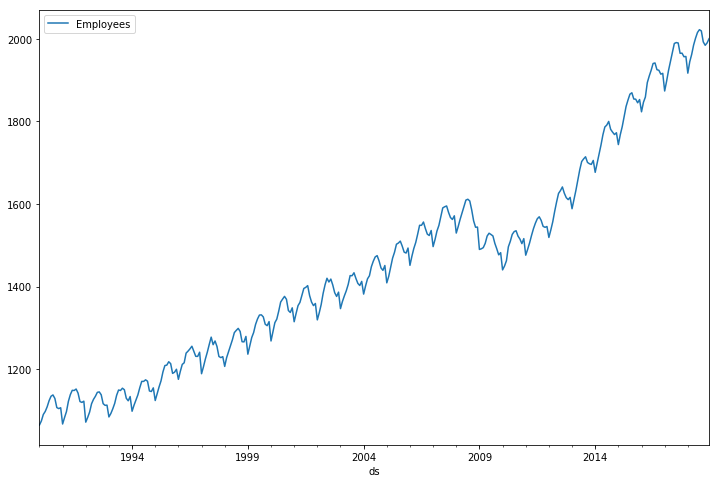

In [16]:
pd.plotting.register_matplotlib_converters()
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

There is a clear trend line change during 2009 recession.<br>

But we can also see a subtle trend line shift upto 1990-1994 and after 1994-2008. 1994-2008 trend line is changing at a much faster rate than 1990-1994 trend line.

In [17]:
len(df)

348

In [18]:
len(df) - 12

336

In [19]:
train = df.iloc[:336]
test = df.iloc[336:]

In [20]:
# To predict future 12 months, fit the model to entire data
m = Prophet()
m.fit(train)
# freq: mention data frequency as prophet expect daily data
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


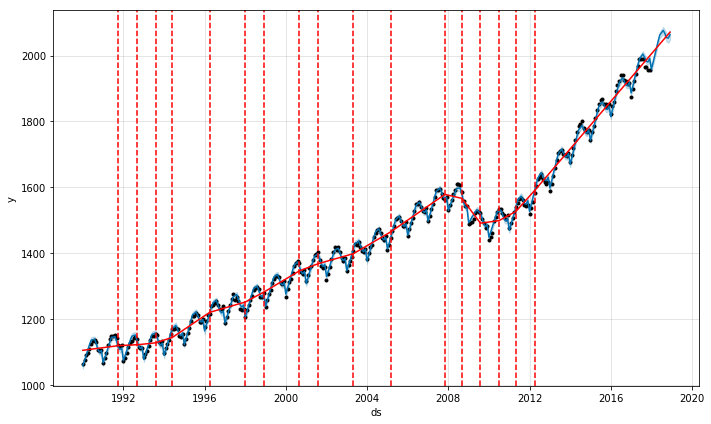

In [21]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
# gca: get current axis
a = add_changepoints_to_plot(fig.gca(), m, forecast)

These red lines suggest the possible points where the data trendline changes. We see some subtle trendline change that are NOT noticable in naked eye and then we see that after 2012 trendline remains pretty stable.